**Table of contents**<a id='toc0_'></a>    
- [Głębokie uczenie dla małych problemów z danymi treningowymi](#toc1_1_)    
  - [Pobieranie danych](#toc1_2_)    
  - [Budowanie naszej pierwszej prostej sieci CNN](#toc1_3_)    
  - [](#toc1_4_)    
  - [Korzystanie z rozszerzenia danych](#toc1_5_)    
  - [ZADANIA (2 punkty)](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<table>
<tr>    
<td style="text-align: center">
<h1>Konwolucyjne sieci neuronowe,<br />uogólnienie oraz augmentacja danych uczących</h1>
<h2><a href="http://home.agh.edu.pl/~horzyk/index.php">Adrian Horzyk</a></h2>
</td> 
<td>
<img src="http://home.agh.edu.pl/~horzyk/im/AdrianHorzyk49BT140h.png" alt="Adrian Horzyk, Professor" title="Adrian Horzyk, Professor" />        
</td> 
</tr>
</table>
<h3><i>Zapraszam do interaktywnego notebooka, w którym możesz dowiedzieć się, jak działają sieci neuronowe, doświadczysz i sprawdzisz ich działanie na wybranych zbiorach danych i przeprowadzisz własne eksperymenty!</i></h3>

## <a id='toc1_1_'></a>[Głębokie uczenie dla małych problemów z danymi treningowymi](#toc0_)

Być może słyszałeś, że głębokie uczenie działa tylko wtedy, gdy dostępnych jest dużo danych. Jest to po części słuszne, ponieważ podstawową cechą uczenia głębokiego jest to, że wiele danych treningowych jest w stanie znaleźć interesujące i wystarczająco częste cechy i wzorce w tych danych bez ręcznej inżynierii cech. Można to osiągnąć tylko wtedy, gdy dostępnych jest wiele przykładów treningowych. Jest to szczególnie prawdziwe w przypadku problemów, w których próbki wejściowe są bardzo wielowymiarowe, takie jak obrazy, gdzie wymiar przestrzeni wejściowej jest zdefiniowany przez rozdzielczość obrazu. 

Jednak to, co stanowi „wiele” próbek, zależy od rozmiaru i głębokości sieci, którą próbujesz trenować. Nie da się wytrenować convneta, aby rozwiązać złożony problem na kilkudziesięciu przykładach, ale kilkaset może czasami wystarczy, jeśli model jest mały i dobrze wyregulowany, a zadanie jest proste.

Ponieważ convnety uczą się lokalnych, niezmiennych cech, są bardzo wydajne w zakresie danych w problemach percepcyjnych. Uczenie convnet od podstaw na bardzo małym zbiorze danych obrazowych nadal przyniesie rozsądne wyniki pomimo względnego braku danych, bez potrzeby projektowania funkcji niestandardowych. Spróbuj to zrobić tutaj - w tym notatniku!

Co więcej, modele uczenia głębokiego są z natury wysoce uniwersalne. Oznacza to, że możesz wziąć klasyfikację obrazu lub model zamiany mowy na tekst wytrenowany na zestawie danych o dużej skali, a następnie ponownie użyć go w znacznie innym problemie z niewielkimi zmianami. Nazywamy to <b>uczeniem transferowym</b>. W szczególności, w przypadku wizji komputerowej, wiele wstępnie wytrenowanych modeli (zazwyczaj wytrenowanych w zestawie danych tj. ImageNet czy COCO) jest publicznie dostępnych do pobrania i można ich używać do ładowania zaawansowanych modeli wizji z bardzo małej ilości danych.

Konieczność trenowania modelu klasyfikacji obrazów przy użyciu bardzo małej ilości danych jest powszechną sytuacją, z którą prawdopodobnie spotkasz się w praktyce w kontekście zawodowym.

Posiadanie „niewielu” próbek może oznaczać od kilkuset do kilkudziesięciu tysięcy obrazów. Definicja „niewielu” zależy od tego, ile mamy wymiarów danych. Demonstrujemy to, klasyfikując obrazy psów i kotów, używając zestawu danych zawierającego 4000 zdjęć kotów i psów (2000 kotów, 2000 psów), którego wymiar przestrzeni danych wejściowych to „img_rows” x „img_cols” = 150 x 150 = 22 500. Nasza praca będzie więc wyglądała następująco:

* Najpierw podzielimy ten zbiór danych na 2000 obrazów treningowych, 1000 obrazów walidacyjnych i 1000 obrazów testowych.

* Następnie przeszkolimy nowy model od zera, rozpoczynając od małego połączenia na naszych 2000 próbkach szkoleniowych, bez żadnej regularyzacji, aby ustalić punkt odniesienia tego, co możemy osiągnąć.

* Następnie przedstawimy <b>rozszerzanie danych (augmentację)</b>, skuteczną technikę łagodzenia nadmiernego dopasowania w wizji komputerowej. Wykorzystując augmentację danych, ulepszymy naszą sieć, aby osiągnąć wyższą dokładność modelu.

* Na koniec zastosujemy <b>wyodrębnianie funkcji za pomocą wstępnie wytrenowanej sieci</b> i <b>dostosujemy wstępnie wytrenowaną sieć</b>, aby zwiększyć ostateczną wydajność modelu.

Strategie te razem będą stanowić podstawowy zestaw narzędzi na przyszłość do rozwiązywania problemu wizji komputerowej z małymi zestawami danych. Następnie użyjemy <b>nauki transferowej</b>, aby szybciej i lepiej trenować modele, stosując wstępnie wytrenowane modele na dużym zbiorze danych, aby skorzystać z dobrze wytrenowanych cech i wzorców reprezentowanych przez filtry, aby łatwiej i szybciej dostosowywać model do podobnych zadań! Filtry sobie również obejrzymy w różnie wytrenowanych modelach, by zobaczyć istotne różnice i wysnuć wnioski.

Na razie zacznijmy od zebrania danych i przygotowania ich do naszych eksperymentów.

<img src="http://home.agh.edu.pl/~horzyk/lectures/jupyternotebooks/images/catsvsdogssamples.png" title="examples of cats and dogs" />

## <a id='toc1_2_'></a>[Pobieranie danych](#toc0_)

Zestaw danych koty kontra psy, którego użyjemy, nie jest dostępny z poziomu Kerasa, więc musimy go pobrać i wstępnie przetworzyć. Został udostępniony przez <a href="https://www.kaggle.com">Kaggle.com</a> w ramach konkursu związanego z problemami wizji komputerowej pod koniec 2013 roku. Możesz pobrać oryginalny zestaw danych ze strony: <a href ="https://www.kaggle.com/c/dogs-vs-cats/data">`https://www.kaggle.com/c/dogs-vs-cats/data`</a> (Będziesz musiał utworzyć sobie konto Kaggle, jeśli go jeszcze nie masz). Zdjęcia to kolorowe pliki JPEG o średniej rozdzielczości (150 x 150 pikseli).

Nic dziwnego, że konkurs koty kontra psy Kaggle w 2013 roku został wygrany przez uczestników, którzy wykorzystali convnety. Najlepsze rozwiązania osiągnęły dokładność do 95% dokładności na zbiorze testowym. W naszym przykładzie zbliżymy się do tej dokładności, chociaż będziemy trenować nasze modele na razie tylko na 8% danych, które były dostępne dla uczestników konkursu, by przyspieszyć proces treningu. Potem w ramach zadań domowych możesz spróbować swój finalny model nauczyć na całym zbiorze lub jego większej części.

Ten oryginalny zestaw danych zawiera 25 000 zdjęć kotów i psów (12 500 z każdej klasy) i ma 543 MB (po skompresowaniu). Po jego pobraniu i rozpakowaniu utworzymy nowy zbiór danych zawierający trzy podzbiory: zestaw uczący zawierający 1000 próbek każdej klasy, zestaw walidacyjny zawierający 500 próbek każdej klasy i na końcu zestaw testowy zawierający 500 próbek każdej klasy. Musimy przyciąć zbiór danych ze względu na czas treningu, by móc z nim poeksperymentować na zwykłym sprzęcie bez GPU. Jeśli jednak masz wystarczająco dużo potężnych jednostek GPGPU, możesz spróbować trenować, sprawdzać i testować swój ostateczny model eksperymentalny na całym zbiorze danych.

Oto kilka linijek kodu, aby to zrobić:

In [1]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

2024-04-10 22:19:17.460008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 22:19:17.460083: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 22:19:17.460111: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 22:19:17.468555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 22:19:18.238062: W tensorflow/compiler/

TensorFlow version: 2.14.1
Keras version: 2.14.0


In [2]:
# The path to store trained models
models_dir = './models/'
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = './kaggle/original/train'

# The directory where we will store our smaller dataset
base_dir = './kaggle/processed/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    
img_rows = 150
img_cols = 150

Policzmy i sprawdźmy, ile obrazów mamy w każdym podzbiorze treningowym, walidacyjnym i testowym.

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


Tak więc rzeczywiście mamy 2000 obrazów treningowych, 1000 obrazów walidacyjnych i 1000 obrazów testowych. W każdym podzbiorze jest taka sama liczba próbek z każdej klasy: jest to tzw. <b>problem zrównoważonej klasyfikacji binarnej</b>, co oznacza, że <b>dokładność klasyfikacji</b> będzie odpowiednią miarą sukcesu.

## <a id='toc1_3_'></a>[Budowanie naszej pierwszej prostej sieci CNN](#toc0_)

Nasz convnet będzie stosem naprzemiennych `Conv2D` (z funkcjami aktywacji `relu` we wszystkich warstwach ukrytych i `softmax`) i `MaxPooling2D`. Znaczenie oraz ograniczenia funkcji `relu` omówimy sobie później.

Jednakże, ponieważ mamy do czynienia z większymi obrazami niż w przypadku danych MNIST i bardziej złożonym problemem, powinniśmy odpowiednio zwiększyć naszą sieć, tj. będzie miała więcej warstw `Conv2D` + `MaxPooling2D`. Służy to zwiększeniu pojemności sieci i dalszemu zmniejszeniu rozmiaru map obiektów, aby nie były zbyt duże, gdy docieramy do warstwy `Flatten`, aby nie generować zbyt wielu parametrów w pierwszej warstwie `Dense`, które by doprowadzały sieć do przeuczenia się. Oczywiście warto poeksperymentować z liczbą warstw i parametrów sieci. Tutaj, ponieważ zaczynamy od danych wejściowych o rozmiarze 150x150 (nieco arbitralny wybór), powinniśmy kończyć z mapami cech o rozmiarze nie większym niż 7x7 tuż przed warstwą `Flatten`, a nawet mogą być jeszcze mniejsze.

Zauważ, że głębokość map obiektów w sieci stopniowo wzrasta (z 32 do 128), podczas gdy rozmiar map obiektów maleje (z 148x148 do 5x5), jak widać w `model.summary()` poniżej. W ten sposób konstruujemy większość convnetów.

Ponieważ rozwiązujemy problem klasyfikacji binarnej, kończymy sieć z pojedynczą jednostką (warstwą „gęstą” o rozmiarze 1) i funkcją aktywacji „sigmoid”. Ta jednostka zakoduje prawdopodobieństwo, że sieć patrzy na jedną lub drugą klasę, gdzie jedna klasa jest reprezentowana przez 0, a druga klasa przez 1.

In [9]:
from keras import layers
from keras import models

img_rows = 150
img_cols = 150

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

2024-04-10 22:19:23.624942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 22:19:23.694077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 22:19:23.694157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 22:19:23.701314: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-10 22:19:23.701385: I tensorflow/compile

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Na etapie kompilacji użyjemy jak zwykle optymalizatora `RMSprop` (później możemy poeksperymentować z różnymi optymalizatorami, co też jest zalecane). Ponieważ zakończyliśmy naszą sieć z pojedynczą jednostką sigmoidalną, użyjemy binarnej crossentropii (`binary_crossentropy`) jako naszej funkcji straty:

In [11]:
#from keras import optimizers
import tensorflow
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## <a id='toc1_4_'></a>[](#toc0_)

Dane wprowadzane do sieci muszą być odpowiednio sformatowane w tensory zmiennoprzecinkowe. Obecnie nasze dane znajdują się na dysku jako pliki JPEG, więc musimy wykonać następujące kroki, aby wprowadzić je do naszej sieci:

* Wczytaj pliki graficzne w formacie JPEG.
* Dekoduj zawartość JPEG do siatek RBG pikseli.
* Przekształć je w tensory zmiennoprzecinkowe.
* Przeskaluj wartości pikseli (od 0 do 255) do interwału $[0, 1]$, ponieważ sieci neuronowe wolą radzić sobie z małymi wartościami wejściowymi. (Uwaga: Zwracam uwagę na sposób kodowania $[0, 1]$, który umożliwia zwracanie uwagi tylko na cechy najmocniejsze, a nie na ich brak. Wtedy należałoby kodować cechy w przedziale $[-1, 1]$, które w połączeniu z wagami ujemnymi, mogą to umożliwić.)

Keras posiada narzędzia, które automatycznie wykonują te kroki, ponieważ posiada moduł z narzędziami pomocniczymi do przetwarzania obrazu, zlokalizowany pod adresem `keras.preprocessing.image` (`tensorflow.keras.preprocessing.image`). W szczególności zawiera klasę `ImageDataGenerator`, która pozwala szybko skonfigurować generatory Pythona, które mogą automatycznie zamieniać pliki obrazów na dysku w partie wstępnie przetworzonych tensorów. Wykorzystamy to tutaj.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    # This is the target directory
    validation_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


Przyjrzyjmy się wynikom jednego z tych generatorów: generuje on partie obrazów RGB o wymiarach 150x150 (kształt `(20, 150, 150, 3)`) i etykiety binarne (kształt `(20,)`). 20 to liczba próbek w każdej partii (`batch_size`). Zauważ, że generator dostarcza te partie w nieskończoność: po prostu zapętla się w nieskończoność nad obrazami znajdującymi się w folderze docelowym. Z tego powodu w pewnym momencie musimy przerwać pętlę iteracji.

In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Nauczmy nasz model danych z wykorzystaniem generatora. Robimy to za pomocą metody `fit`. Oczekuje jako pierwszego argumentu generatora Pythona, który będzie dostarczał partie danych wejściowych i celów w nieskończoność, tak jak robi to nasz. Ponieważ dane są generowane w nieskończoność, generator musi wiedzieć na przykład, ile próbek pobrać z generatora przed ogłoszeniem końca epoki. Taka jest rola argumentu `steps_per_epoch`: po pobraniu partii `steps_per_epoch` z generatora, tj. po uruchomieniu dla kroków gradientu `steps_per_epoch`, proces treningu przejdzie do następnej epoki. W naszym przypadku partie mają wielkość 20 próbek, więc zajmie to 100 partii, zanim zobaczymy nasz cel 2000 próbek (20 x 100 = 2000).

Używając `fit `, można przekazać argument `validation_data`. Co ważne, ten argument może być samym generatorem danych, ale może to być również krotka tablic Numpy. Jeśli przekażesz generator jako `validation_data`, oczekuje się, że ten generator będzie dostarczał wsadów danych walidacyjnych bez końca, a zatem powinieneś również określić argument `validation_steps`, który mówi procesowi, ile partii ma pobrać z generatora walidacji do przeprowadzenia oceny (walidacji). W przypadku danych walidacyjnych widzimy nasz cel 1000 próbek (20 x 50 = 1000).

In [14]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


2024-04-10 22:19:26.266005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-04-10 22:19:26.583939: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-10 22:19:27.213416: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-10 22:19:27.694333: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f84e5107220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-10 22:19:27.694382: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-04-10 22:19:27.701149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-10 22:19:27.753813: I ./tensorflow/compiler/jit/device_comp

100/100 [==============================] - 11s 68ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6895 - acc: 0.5345 - val_loss: 0.6853 - val_acc: 0.5580
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6812 - acc: 0.5700 - val_loss: 0.6834 - val_acc: 0.5300
Epoch 4/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6696 - acc: 0.6015 - val_loss: 0.6702 - val_acc: 0.5800
Epoch 5/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6567 - acc: 0.6185 - val_loss: 0.6569 - val_acc: 0.6050
Epoch 6/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6458 - acc: 0.6350 - val_loss: 0.6469 - val_acc: 0.6100
Epoch 7/30
100/100 [==============================] - 6s 65ms/step - loss: 0.6321 - acc: 0.6425 - val_loss: 0.6426 - val_acc: 0.6180
Epoch 8/30
100/100 [==============================] - 6s 63ms/step - loss: 0.62

Dobrą praktyką jest zawsze zapisywanie modeli po przeszkoleniu, aby użyć ich później do porównań lub <b>nauki transferowej</b>:

In [15]:
model1.save(models_dir + 'cats_and_dogs_small_1.h5')

/home/lenovo/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Narysujmy wykresy funkcji straty i dokładności modelu na danych uczących i walidacyjnych podczas uczenia:

In [16]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

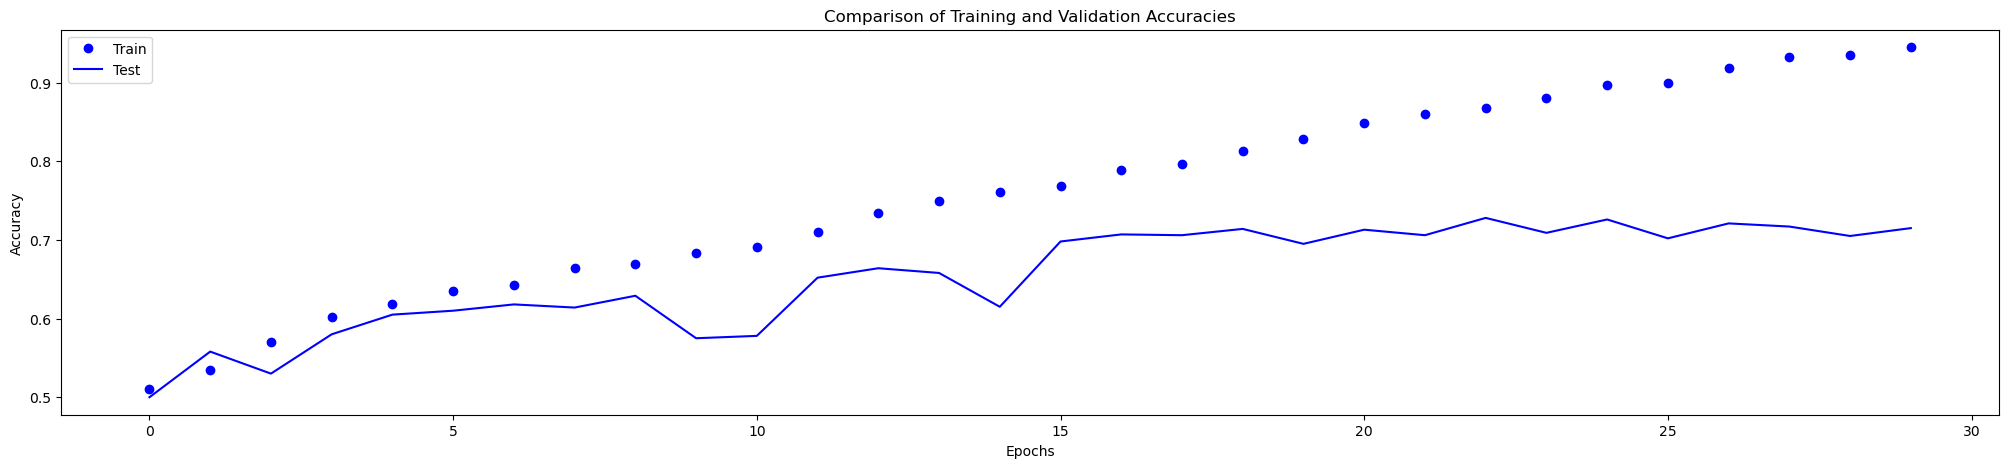

<Figure size 640x480 with 0 Axes>

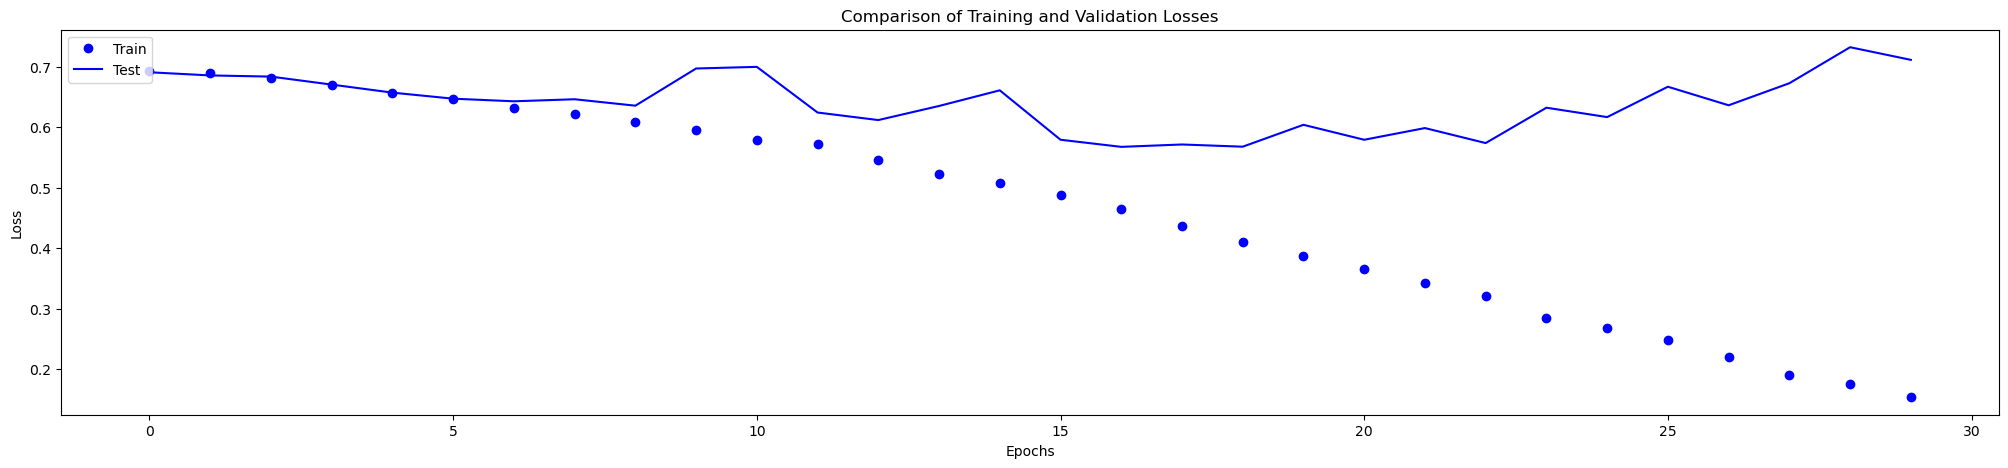

In [17]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

Te wykresy prezentują przesadne dopasowanie (overfitting). Dokładność (accuracy) treningu stopniowo wzrasta z czasem, osiągając ponad 96% dokładności w 30. epoce, zaś strata treningu (loss) stopniowo maleje z czasem. Z drugiej strony dokładność walidacji zatrzymuje się na poziomie ok. 70-73%. Nasza strata walidacji osiąga minimum już po kilku epokach, a następnie zmienia się i nie wzrasta korzystnie.

Ponieważ mamy stosunkowo niewiele próbek szkoleniowych (2000), overfitting będzie naszym problemem numer jeden. Wiesz już o wielu technikach, które mogą pomóc w łagodzeniu nadmiernego dopasowania, takich jak odpadanie i spadek wagi (regularyzacja L1 czy L2). Wprowadzimy teraz nowy — <b>rozszerzanie danych (augmentacja)</b> — specyficzny dla widzenia komputerowego i używany niemal powszechnie podczas przetwarzania obrazów w modelach głębokiego uczenia.

## <a id='toc1_5_'></a>[Korzystanie z rozszerzenia danych](#toc0_)

Nadmierne dopasowanie jest spowodowane zbyt małą liczbą próbek, z których można się uczyć i wystarczająco reprezentatywnie pokryć przestrzeń danych wejściowych, co uniemożliwia nam wytrenowanie modelu zdolnego do uogólniania na nowe dane. Rozszerzanie danych (augmentacja) polega na generowaniu większej ilości danych treningowych z istniejących próbek treningowych poprzez „rozszerzanie” próbek za pomocą szeregu losowych przekształceń (takich jak obracanie, przesuwanie, powiększanie, odwracanie itp.), które dają wiarygodnie wyglądające obrazy. Celem jest, aby w czasie treningu model nigdy nie widział dwa razy dokładnie tego samego obrazu. Pomaga to modelowi uzyskać dostęp do większej liczby aspektów danych, a w wyniku tego lepiej uogólniać. Lecz uwaga, operacje rozszerzające muszą być odpowiednio dobrane do specyfiki danych uczących, gdyż w odwrotnym przypadku może dojść do spadku efektywności modelu.

W Keras można to zrobić, konfigurując liczbę losowych przekształceń, które mają być wykonywane na obrazach odczytanych przez instancję `ImageDataGenerator`. Zróbmy to z naszym zbiorem danych:

In [18]:
img_rows = 150
img_cols = 150

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

To tylko kilka z dostępnych opcji (więcej można znaleźć w <a href="https://keras.io/api/preprocessing/image/">dokumentacji Keras</a>):

* `rotation_range` to wartość wyrażona w stopniach (0-180), zakres, w którym można losowo obracać zdjęcia.
* `width_shift` i `height_shift` to zakresy (jako ułamek całkowitej szerokości lub wysokości), w ramach których można losowo przesuwać obrazy w pionie lub poziomie.
* `shear_range` służy do losowego stosowania transformacji ścinania.
* `zoom_range` służy do losowego powiększania wewnątrz zdjęć.
* `horizontal_flip` służy do losowego odwracania połowy obrazów w poziomie - ma zastosowanie, gdy nie ma założeń asymetrii poziomej (np. zdjęcia ze świata rzeczywistego).
* `fill_mode` to strategia używana do wypełniania nowo utworzonych pikseli, które mogą pojawić się po obrocie lub zmianie szerokości/wysokości.

Zobaczmy jak będą wyglądały nasze powiększone zdjęcia kotów lub psów na przykładzie:

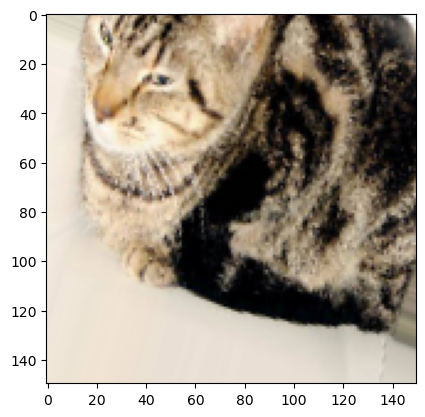

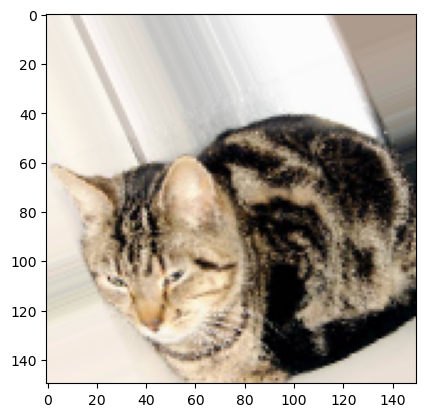

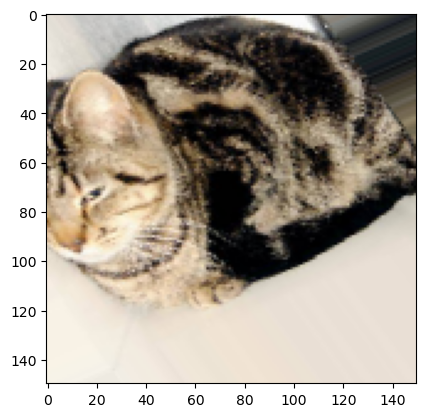

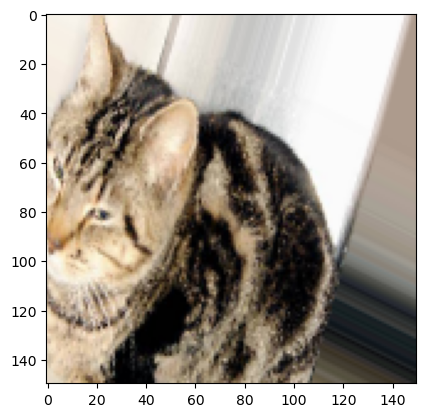

In [19]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_rows, img_cols))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Jeśli wyszkolimy nową sieć przy użyciu tej konfiguracji rozszerzania danych, nasza sieć nigdy nie zobaczy dwa razy tego samego sygnału wejściowego. Jednak dane wejściowe, które widzi, są nadal silnie ze sobą skorelowane, ponieważ pochodzą z niewielkiej liczby oryginalnych obrazów – nie możemy wytworzyć nowych informacji, możemy jedynie zmiksować istniejące informacje. W związku z tym może to nie wystarczyć, aby całkowicie pozbyć się nadmiernego dopasowania. Aby jeszcze bardziej zwalczyć overfitting, dodamy również warstwę Dropout do naszego modelu tuż przed gęsto połączonym klasyfikatorem:

In [20]:
from keras import layers
from keras import models
from keras import optimizers

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

Wytrenujmy naszą sieć za pomocą augmentacji i dropoutu danych:

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')

#history2 = model2.fit_generator(
history2 = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s 125ms/step - loss: 0.6935 - acc: 0.5100 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6937 - acc: 0.5105 - val_loss: 0.6907 - val_acc: 0.5960
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6922 - acc: 0.5120 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6873 - acc: 0.5495 - val_loss: 0.6823 - val_acc: 0.5370
Epoch 5/100
100/100 [==============================] - 12s 122ms/step - loss: 0.6828 - acc: 0.5570 - val_loss: 0.6736 - val_acc: 0.5830
Epoch 6/100
100/100 [==============================] - 12s 125ms/step - loss: 0.6807 - acc: 0.5665 - val_loss: 0.6675 - val_acc: 0.5830
Epoch 7/100
100/100 [==============================] - 11s 113ms/step - loss: 0.6700 - acc: 0.5925 -

Zapiszmy nasz model 2, ponieważ będziemy go później używać.

In [23]:
model2.save(models_dir + 'cats_and_dogs_small_2.h5')

/home/lenovo/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

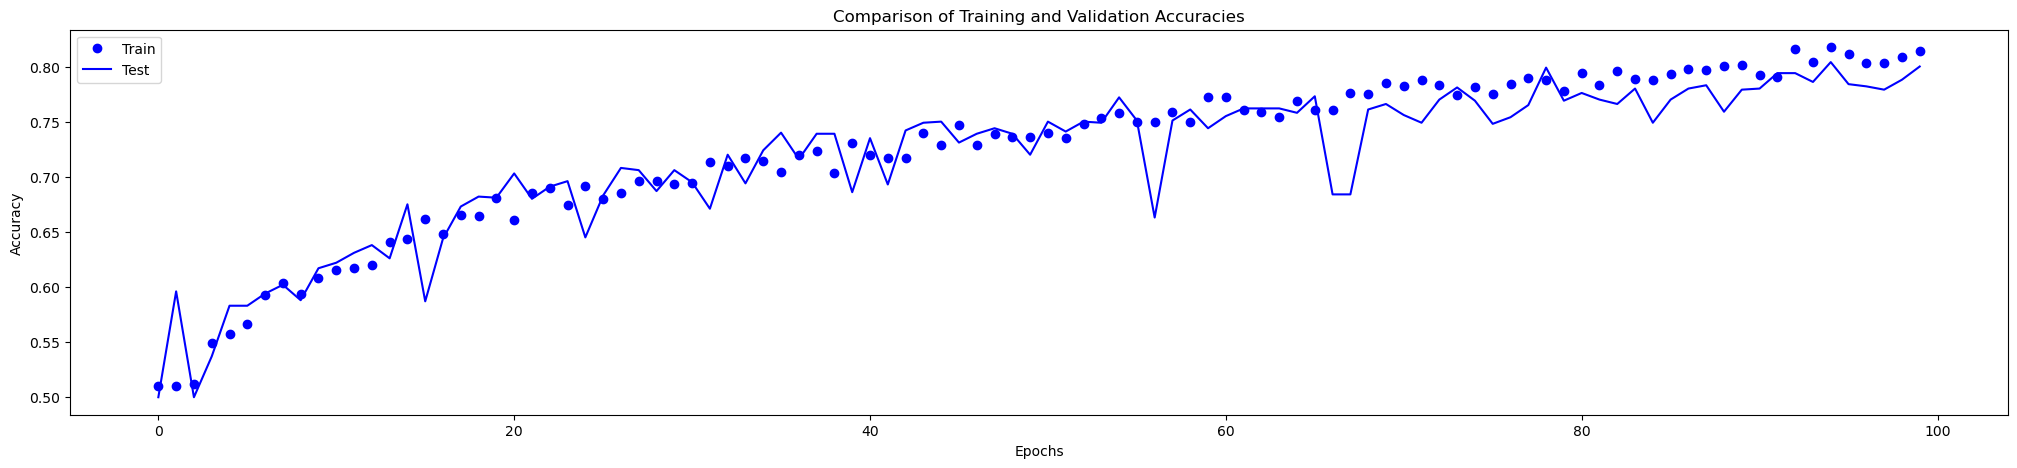

<Figure size 640x480 with 0 Axes>

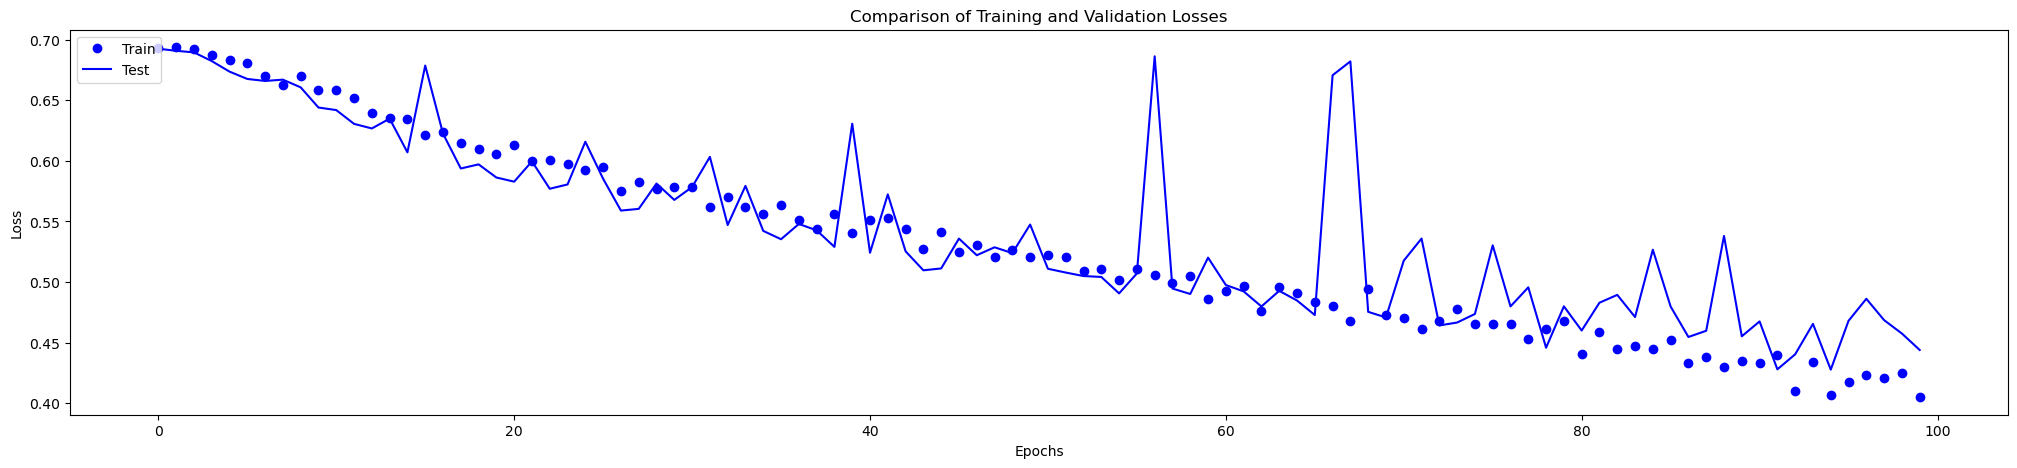

In [24]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

Dzięki augmentacji i dropoutowi danych nasz model nie przeucza się już. Jak widzimy, krzywe walidacyjne dość ściśle śledzą krzywe treningowe. Jesteśmy teraz w stanie osiągnąć dokładność 82-83%, czyli ~10% względnej poprawy w stosunku do modelu nieuregulowanego i nie wykorzystującego augmentacji.

Jeszcze bardziej wykorzystując techniki regularyzacji i dostrajając hiperparametry sieci (takie jak liczba warstw w sieci i liczba filtrów na warstwę splotu), możemy być w stanie uzyskać jeszcze większą dokładność. To Twoje zadanie. Możliwość ulepszenia tego modelu jest ograniczona, po prostu dlatego, że mamy za mało danych treningowych do pracy. Jako następny krok w celu poprawy dokładności w tym problemie, będziemy musieli wykorzystać wstępnie wytrenowany model transferowy i/lub wykorzystać więcej przykładów uczących, które są dostępne w tym zbiorze danych.

In [25]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotTwoAccuracyComparison(acc1, val_acc1, acc2, val_acc2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotTwoLossComparison(loss1, val_loss1, loss2, val_loss2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

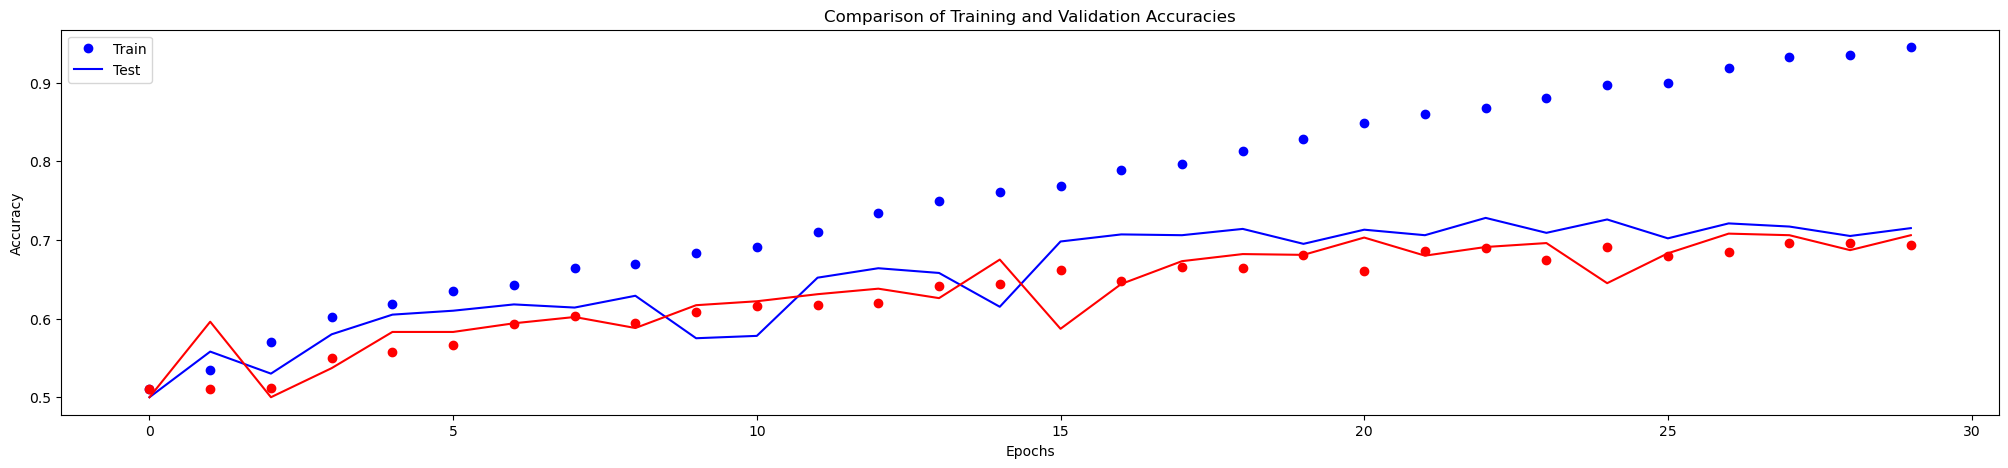

<Figure size 640x480 with 0 Axes>

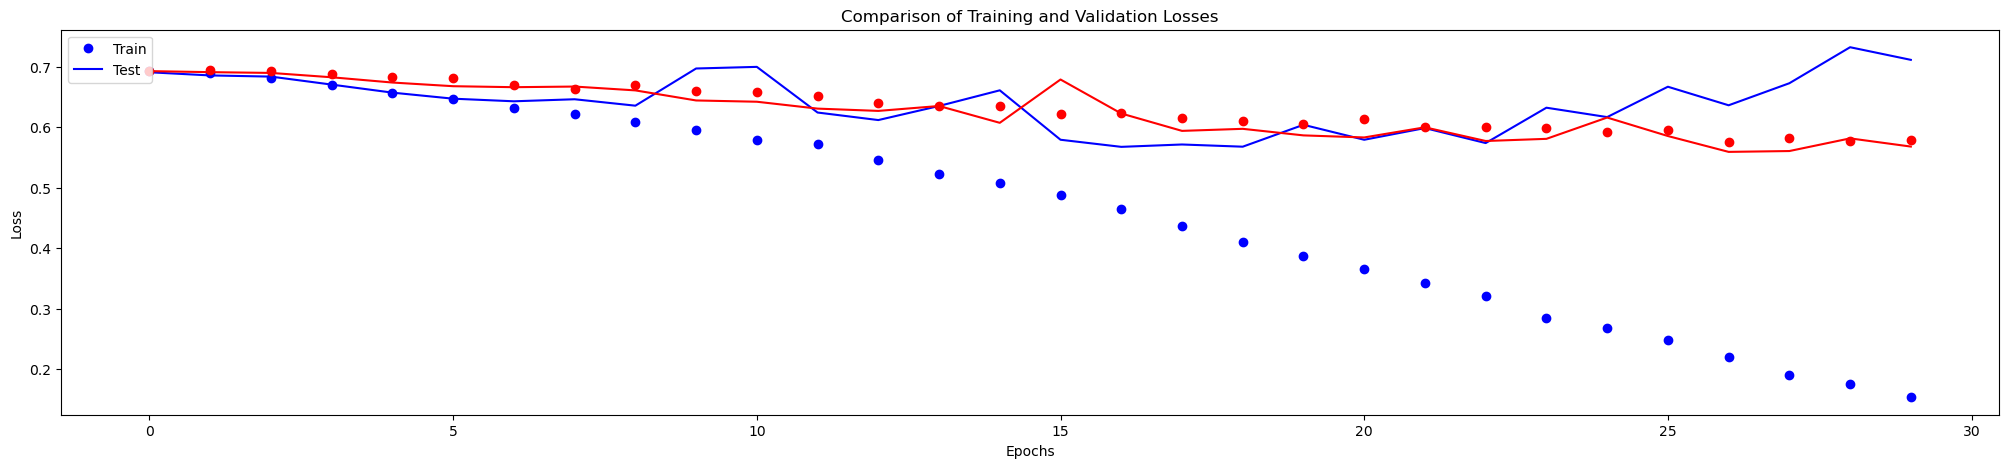

In [26]:
PlotTwoAccuracyComparison(acc1, val_acc1, acc2[:30], val_acc2[:30], lab1 = 'Model 1', lab2 = 'Model 2')
PlotTwoLossComparison(loss1, val_loss1, loss2[:30], val_loss2[:30], lab1 = 'Model 1', lab2 = 'Model 2')

Porównania poprzedniego modelu (na niebiesko) i modelu rozszerzonego (na czerwono) podczas pierwszych 30 epok pokazują, że model rozszerzony nie ulega przeuczeniu i prowadzi do lepszej generalizacji na danych testowych.

## <a id='toc1_6_'></a>[ZADANIA (2 punkty)](#toc0_)

* Zmodyfikuj hiperparametry modelu (strukturę, liczbę warstw w sieci i liczbę filtrów na warstwę splotu, augmentację, regularyzację, dropout i inne hiperparametry, dodaj normalizację wsadową, użyj różnych funkcji aktywacji itp.) oraz spróbuj osiągnąć wyższą dokładność.
* Wybierz więcej niż 2000 przykładów treningowych ze zbioru danych i sprawdź, jak bardzo pomaga to lepiej nauczyć model przy rosnącej liczbie przykładów wykorzystywanych do uczenia. Zwiększ liczbę tylko przykładów uczących, używając np. 4000, 8000, aż do 23000 przykładów. Jeśli moc obliczeniowa twojego komputera jest niewystarczająca, nie używaj wszystkich. Dla porównań użyj tego samego zestawu walidacyjnego i testowego, aby uzyskać wiarygodne porównania do modeli stosujących inną liczbę przykładów uczących oraz z zaprezentowanym tutaj modelem.
* Porównaj wyniki uzyskane dla różnych hiperparametrów. Zmieniaj hiperparametry pojedynczo. Wyciągnij wnioski dotyczące wykorzystania różnych hiperparametrów w swoich eksperymentach. 
* Porównaj dokładność (accuracy) i straty (loss) swoich modeli za pomocą wykresów (np. PlotTwoAccuracyComparison i PlotTwoLossComparison).
* Przechowuj opracowany model `model2.save(models_dir + 'cats_and_dogs_small_my.h5')` ponieważ użyjemy go ponownie na następnych zajęciach do wizualizacji i inspekcji filtrów!
* Na koniec użyj innego zestawu danych obrazu, np. z <a href="www.kaggle.com">Kaggle.com</a> do klasyfikacji, wytrenuj go i zapisz, aby użyć go ponownie w następnych zajęciach do wizualizacji i kontroli filtry!